# 1. Introduction

Describe the approach chosen, reason for choosing it and how you implemented it.

I choose to implement the controlled environment approach. I thought about the kind of data that was used to train my model in previous labs, and decided that if my model had a specific set of images that it could clearly identify which number of fingers are being held up, it would result in a higher accuracy when being trained. One negative about this approach, however, could be that the model overfits to the controlled environment, and ends up performing worse on the test set.

# 2. Model training and Results
Any code to train a model and produce results or a reference to the notebook/code file.

In [1]:
!pip install -Uqq fastbook

import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *

In [11]:
path = Path('/content/gdrive/MyDrive/Colab Notebooks/lab_5_digits/')
set_seed(42, True)

digits = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'),
    item_tfms=Resize(640))

In [12]:
dls = digits.dataloaders(path, bs=32, seed=42)

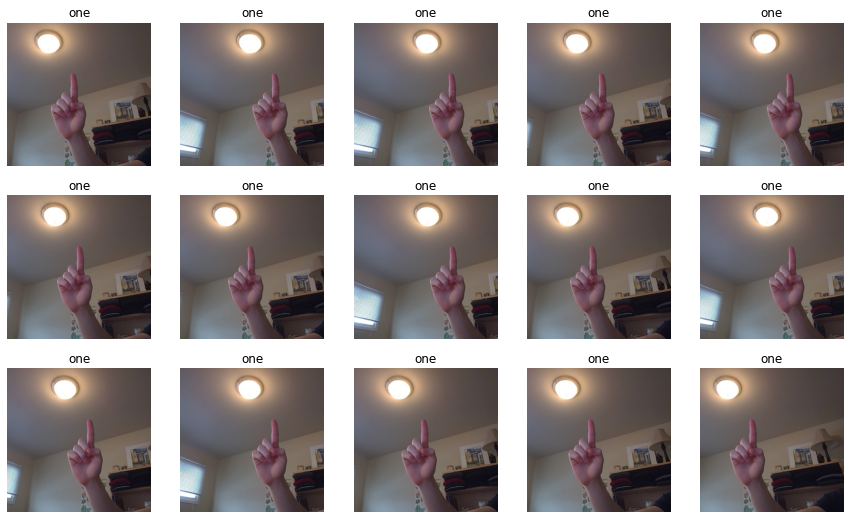

In [13]:
dls.train.show_batch(max_n=15, nrows=3, unique=True)

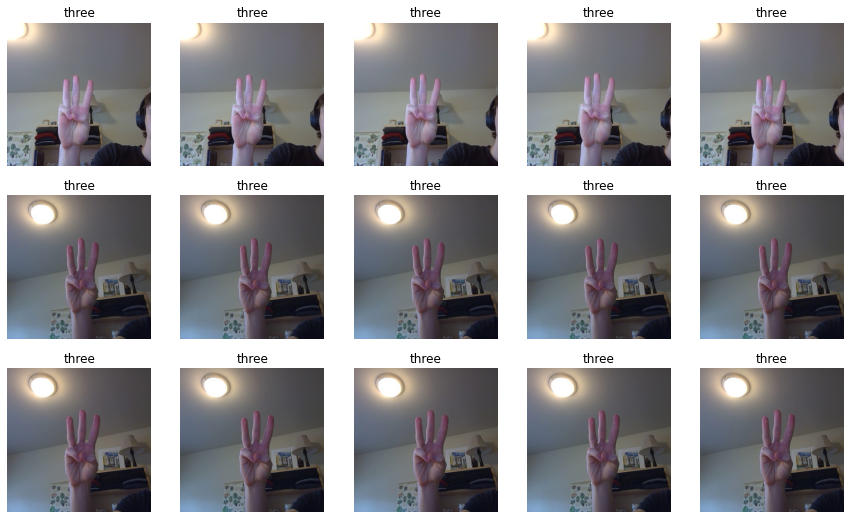

In [14]:
dls.valid.show_batch(max_n=15, nrows=3)

## Training the Classifier

In [15]:
set_seed(42, True)
dls = digits.dataloaders(path,bs=32, seed=42)
learn = cnn_learner(dls, resnet18, metrics=accuracy)

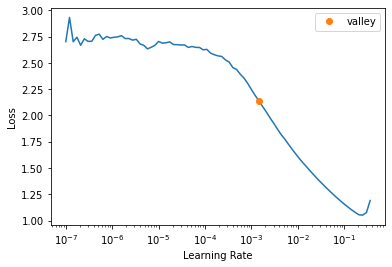

In [16]:
lr_valley = learn.lr_find()

In [17]:
lr_valley

SuggestedLRs(valley=0.0014454397605732083)

In [18]:
learn.fit_one_cycle(3, lr_valley)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-5,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.600782,1.837254,0.280000,00:50
1,0.797243,0.776181,0.720000,00:34
2,0.478834,0.761527,0.730000,00:33


epoch,train_loss,valid_loss,accuracy,time
0,0.044522,0.782998,0.790000,00:44
1,0.031771,0.790115,0.800000,00:44
2,0.048325,0.179078,0.930000,00:44
3,0.037854,0.667870,0.930000,00:44
4,0.026450,0.274184,0.950000,00:44
5,0.019080,0.234378,0.950000,00:44
6,0.016779,0.533106,0.920000,00:44
7,0.012735,0.322513,0.950000,00:44
8,0.009760,0.245048,0.960000,00:44
9,0.007481,0.184507,0.960000,00:44


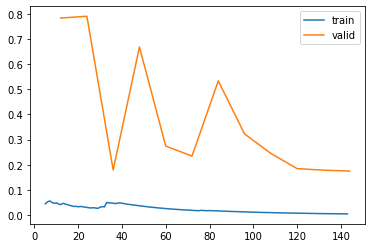

In [19]:
learn.recorder.plot_loss()

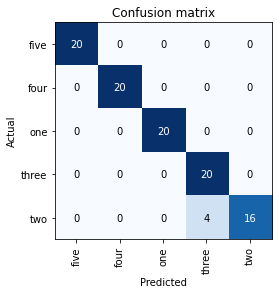

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

As seen from the results above, when the model is trained with more data, as well as data that is in a controlled environment, the model performs much better than before. The model can be saved and testing using the gui provided in lab 4 to see how it performs on live test data.

In [21]:
export_path = Path('/content/gdrive/MyDrive/Colab Notebooks/Lab5_model/')
if not(export_path).exists():
  export_path.mkdir()

  name = export_path/'finger_count.pkl'
  learn.export(fname=name)

## Testing the Model

In [22]:
path = Path('/content/gdrive/MyDrive/Colab Notebooks/lab_5_digits/test/')

In [26]:
pred1 = learn.predict(path/'two/00000002.jpg')
pred1

('five',
 TensorBase(0),
 TensorBase([7.5787e-01, 4.9615e-04, 3.4756e-06, 2.4162e-01, 7.4971e-06]))

# 3. Summary and Conclusion
Summarize your new results and state your lab3 and lab4 results.


Conclusion: How large is the improvement in the performance of the classifier due to the approach chosen? Include your interpretation why it worked (or did not work).

From my new results, training my model yielded me an accuracy of 96 %. The model was trained with a new set of training and validation data, and double the amount of each set of data. As previously tested, the model I created from lab 3 reached an accuracy of 26 %. When tested with `learn.predict()` in lab 4, the model was able to reach an accuracy of 28 %.

This improvement is quite large, with a difference in percentage of 70 %. I believe that this approach worked was because the model had double the amount of data to train on, with almost all of the training data being similar due to the controlled environment. This allowed the model to accurrately identify all the different classifiers.

# 4. Reflection
Include a sentence or two about
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating

while working on this assignment.

*YOUR ANSWER HERE*

